In [165]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy.lib.index_tricks import diag_indices

In [166]:
# spins from -1 to 1

zero = np.array([
0,1,1,1,0,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
0,1,1,1,0
])

zero = np.where(zero != 0, zero, -1)

one=np.array([
0,1,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0
])

one = np.where(one != 0, one, -1)

two=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,1,1,0,0,
1,0,0,0,0,
1,1,1,1,1,
])

two = np.where(two != 0, two, -1)

noisy0=np.array([
0,1,1,1,0,
1,0,0,0,0,
1,0,0,0,1,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
])

noisy0 = np.where(noisy0 != 0, noisy0, -1)

noisy2=np.array([
1,1,1,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
1,0,0,0,0,
1,1,0,0,1,
])

noisy2 = np.where(noisy2 != 0, noisy2, -1)

noisy2b=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
])

noisy2b = np.where(noisy2b != 0, noisy2b, -1)

#   Initialization

time_step = 10

noisy0_copy = noisy0
noisy1_copy = noisy2
noisy2_copy = noisy2b

# Tensor product of our patterns

tens0 = np.tensordot(zero, zero, axes = 0)
tens1 = np.tensordot(one, one, axes = 0)
tens2 = np.tensordot(two, two, axes = 0)
tens_sum = tens0 + tens1 + tens2

# Defined diagonal matrix

one_ar = np.ones((30,30))
diag_matrix = np.diag(np.diag(one_ar))

# W matrix calculation

w_matrix = 1/3 * (tens0 + tens1 + tens2) - 3 * diag_matrix  # eksperyment z przemnozeniem macierzy

energy_zero = np.array([])
energy_one = np.array([])
energy_two = np.array([])

time_axis = np.arange(0, time_step, 1)

# Zero pattern

for t in range(time_step):
    a = np.dot(w_matrix, noisy0_copy)
    energy_sum = np.sum(-1/2 * a * noisy0_copy)
    energy_zero = np.append(energy_zero, energy_sum) 
    a_where_lower = a < 0
    noisy0_copy[a_where_lower] = np.negative(noisy0_copy[a_where_lower])

# One pattern

for t in range(time_step):
    b = np.dot(w_matrix, noisy1_copy)
    energy_sum = np.sum(-1/2 * b * noisy1_copy)
    energy_one = np.append(energy_one, energy_sum) 
    b_where_lower = b < 0
    noisy1_copy[b_where_lower] = np.negative(noisy1_copy[b_where_lower])

# Two pattern

for t in range(time_step):
    c = np.dot(w_matrix, noisy2_copy)
    energy_sum = np.sum(-1/2 * c * noisy2_copy)
    energy_two = np.append(energy_two, energy_sum) 
    c_where_lower = c < 0
    noisy2_copy[c_where_lower] = np.negative(noisy2_copy[c_where_lower])


In [167]:
print(a_where_lower)
print(a)
energy

[False  True  True False False False False  True False False False False
  True False False False False  True False False False False  True False
 False False False  True False False]
[  1.66666667 -10.33333333 -10.33333333   3.           4.33333333
   3.           4.33333333  -6.33333333   1.66666667   3.
   3.           4.33333333  -6.33333333   1.66666667   3.
   3.           1.66666667  -9.           4.33333333   3.
   0.33333333   4.33333333  -6.33333333   4.33333333   3.
   1.66666667   0.33333333 -10.33333333   0.33333333   1.66666667]


array([ -31.,  -15.,   15.,  -25.,   15.,  -41.,  -81.,   -1.,  -87.,
         -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1.,
       -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,
         -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1.,
       -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,
         -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1.,
       -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,
         -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1.,
       -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,
         -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1.,
       -111.,   -1., -111.,   -1., -111.,   -1., -111.,   -1., -111.,
         -1.])

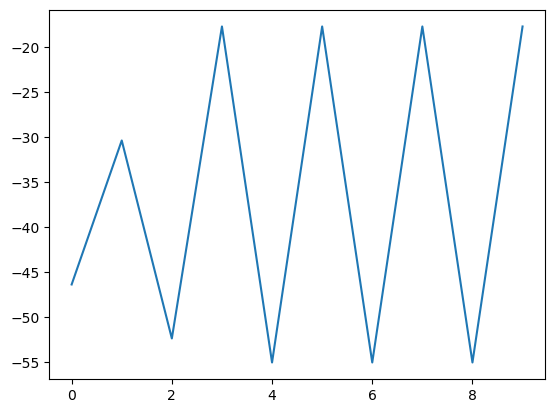

In [168]:
plt.plot(time_axis, energy_one)
plt.show()

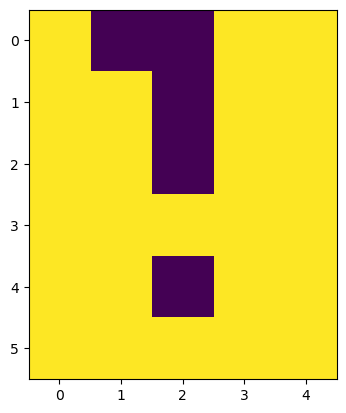

In [169]:

D = np.reshape(noisy2_copy, (-6, 5))
plt.imshow(D)
plt.show()

# We will try to view those numbers here by converting vector to 2d array 

In [170]:
import numpy as np

A = np.array([1, 2, 3, 4, 5, 6])
B = np.reshape(A, (-1, 2))

C = np.reshape(zero, (-6, 5))

In [171]:
C

array([[-1,  1,  1,  1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1, -1,  1],
       [-1,  1,  1,  1, -1]])

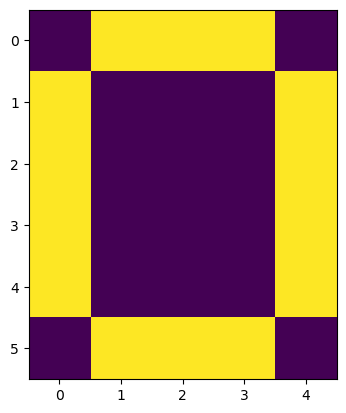

In [172]:
plt.imshow(C)
plt.show()